In [8]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [2]:
df = pd.read_excel("~/Desktop/удаленныеЧеки.xlsx", sheet_name='вместе', parse_dates=['только_дата'])

In [3]:
df = df.drop_duplicates('№')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 252
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   №                   222 non-null    int64         
 1   Дата                222 non-null    datetime64[ns]
 2   Кол-во              222 non-null    int64         
 3   Стоимость           222 non-null    int64         
 4   Сумма НДС           222 non-null    float64       
 5   Модель              222 non-null    object        
 6   Серийный номер      222 non-null    int64         
 7   Торговая точка      222 non-null    object        
 8   Терминал            222 non-null    int64         
 9   Наименование        222 non-null    object        
 10  ИНН                 222 non-null    int64         
 11  Наименование2       222 non-null    object        
 12  Кол-во3             222 non-null    int64         
 13  Цена                222 non-null    int64         
 14 

In [5]:
df.head()

,№,Дата,Кол-во,Стоимость,Сумма НДС,Модель,Серийный номер,Торговая точка,Терминал,Наименование,ИНН,Наименование2,Кол-во3,Цена,Сумма,Ставка НДС,Безналичная оплата,Код товара,вид,только_дата
0,7728754,2023-11-01 06:26:27,1,100,16.67,Sigma Simplicity с сиропами PM + тесты,1803048,МЦК КХ Локомотив 2 пл 0338,244,ПЛАЗА-ТЕЛЕКОМ ООО,5047104371,Капучино + Сахар,1,100,100,0.2,0,NaN,кофе,2023-11-01
1,7742586,2023-11-02 21:49:08,1,150,25.00,Sigma Touch с сиропами PM + тесты,1512022,АВ - Проспект мира 01128,34,ПЛАЗА-ТЕЛЕКОМ ООО,5047104371,Латте,1,150,150,0.2,0,NaN,кофе,2023-11-02
2,7760307,2023-11-06 20:16:57,1,80,13.33,Sigma Simplicity с сиропами PM + тесты,1807012,МЦК КХ ш.Энтузиастов о.0345,298,ПЛАЗА-ТЕЛЕКОМ ООО,5047104371,Горячий шоколад,1,80,80,0.2,0,NaN,кофе,2023-11-06
3,7762285,2023-11-07 09:14:44,1,150,25.00,Sigma Touch с сиропами PM + тесты,1511071,"АВ - Чаянова, 14 0140",35,ПЛАЗА-ТЕЛЕКОМ ООО,5047104371,Капучино,1,150,150,0.2,0,NaN,кофе,2023-11-07
4,7780635,2023-11-09 17:59:50,1,100,16.67,Sigma Touch с сиропами PM + тесты,1512017,ВШЭ М.Ордынка КХ 0018,404,ПЛАЗА-ТЕЛЕКОМ ООО,5047104371,Капучино,1,100,100,0.2,0,NaN,кофе,2023-11-09


In [20]:
days = pd.date_range(start=df['только_дата'].min(), end=dt.datetime.today(), freq='D')

In [23]:
days = pd.DataFrame(days).rename(columns={0: 'только_дата'})

In [24]:
days.head()

,только_дата
0,2023-11-01
1,2023-11-02
2,2023-11-03
3,2023-11-04
4,2023-11-05


In [28]:
df = df.merge(days, how='right')

In [29]:
df.fillna(value={'Кол-во': 0}, inplace=True)

In [43]:
df.sort_values(by="только_дата")

,№,Дата,Кол-во,Стоимость,Сумма НДС,Модель,Серийный номер,Торговая точка,Терминал,Наименование,ИНН,Наименование2,Кол-во3,Цена,Сумма,Ставка НДС,Безналичная оплата,Код товара,вид,только_дата
0,7728754.0,2023-11-01 06:26:27,1.0,100.0,16.67,Sigma Simplicity с сиропами PM + тесты,1803048.0,МЦК КХ Локомотив 2 пл 0338,244.0,ПЛАЗА-ТЕЛЕКОМ ООО,5.047104e+09,Капучино + Сахар,1.0,100.0,100.0,0.2,0.0,NaN,кофе,2023-11-01
1,7742586.0,2023-11-02 21:49:08,1.0,150.0,25.00,Sigma Touch с сиропами PM + тесты,1512022.0,АВ - Проспект мира 01128,34.0,ПЛАЗА-ТЕЛЕКОМ ООО,5.047104e+09,Латте,1.0,150.0,150.0,0.2,0.0,NaN,кофе,2023-11-02
2,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-03
3,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-04
4,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,8162361.0,2024-01-15 20:16:43,1.0,100.0,16.67,Sigma Simplicity с сиропами PM + тесты,1811022.0,ГБУЗ Никио им.Л.И.Свержевского - ВВ 1167,361.0,ПЛАЗА-ТЕЛЕКОМ ООО,5.047104e+09,Американо,1.0,100.0,100.0,0.2,0.0,NaN,кофе,2024-01-15
239,8167904.0,2024-01-16 17:32:20,1.0,110.0,18.33,Sigma Touch с сиропами PM + тесты,1512017.0,ВШЭ М.Ордынка КХ 0018,404.0,ПЛАЗА-ТЕЛЕКОМ ООО,5.047104e+09,Капучино,1.0,110.0,110.0,0.2,0.0,NaN,кофе,2024-01-16
240,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-17
241,8177508.0,2024-01-18 09:48:42,1.0,150.0,25.00,Sigma Touch с сиропами PM + тесты,1708013.0,Правительство МО АВ 3 эт 0221 (ДВА КАПИТАНА),207.0,ПЛАЗА-ТЕЛЕКОМ ООО,5.047104e+09,Капучино + Сахар,1.0,150.0,150.0,0.2,0.0,NaN,кофе,2024-01-18


C:\Users\ms\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ms\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ms\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ms\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

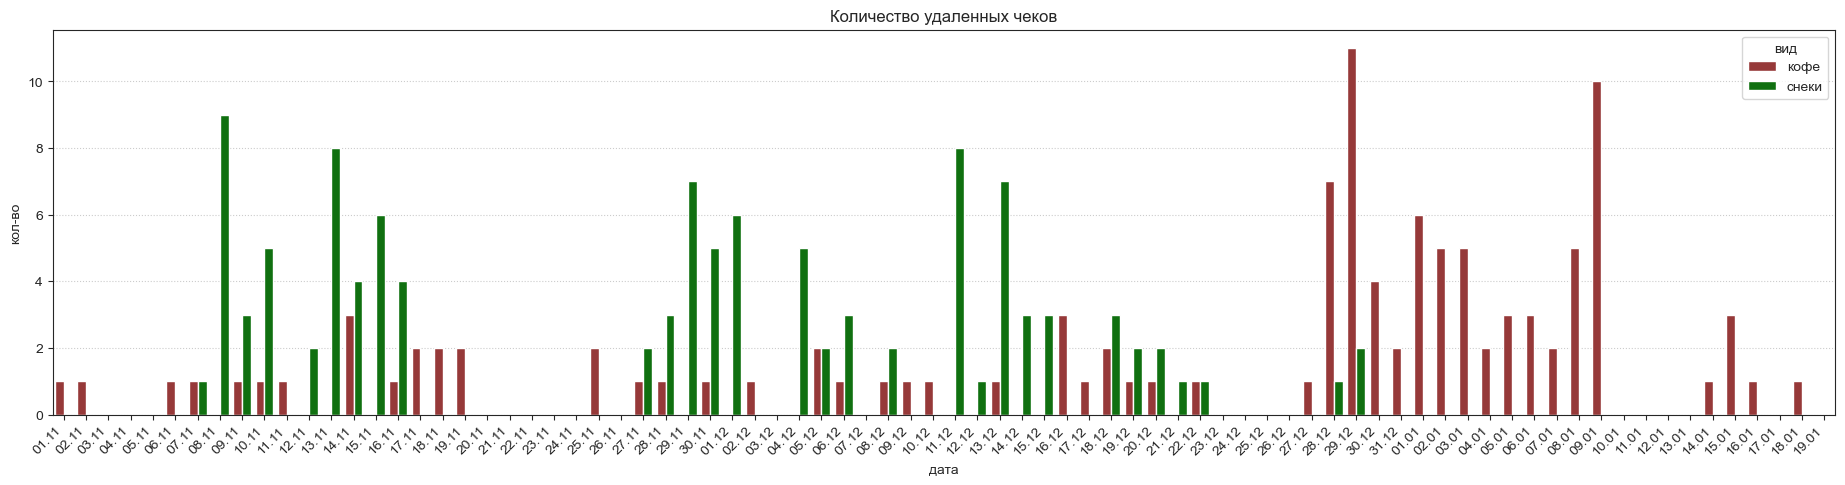

In [107]:
#matplotlib.style.use('default')
#sns.set_theme() # set default sns style
sns.set_style('ticks', {'axes.grid': True, "grid.linestyle": ":"})
fig, axes = plt.subplots(figsize=(23, 5))

axes = sns.countplot(x=df['только_дата'],
                     data=df.sort_values(by="только_дата"),
                     hue='вид',
                     palette=['brown', 'green'],
                     width=0.8)
axes.set(xlabel='дата', ylabel='кол-во', autoscale_on=True)

x_dates = df['только_дата'].dt.strftime('%d.%m').unique()
axes.set_xticklabels(labels=x_dates, rotation=45, ha='right')
axes.set_title("Количество удаленных чеков")
plt.savefig('image.png', bbox_inches='tight')